In [1]:
import numpy as np
import embedded_voting as ev
import matplotlib.pyplot as plt
from tqdm import tqdm
np.random.seed(42)

In [2]:
def create_f(A):
    def f(ratings_v, history_mean, history_std):
        return np.sqrt(np.maximum(0, A + (ratings_v - history_mean) / history_std))
    return f

In [3]:

n_candidates = 20
n_steps = 25
n_try = 1000

# Seulement le gros groupe ?

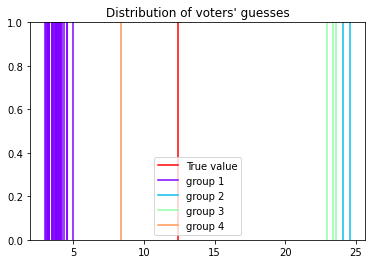

In [10]:
groups_sizes = [32, 2, 3, 1]
features = [[1, 0,0,0], [0, 1,0,0], [0,0,1,0], [0,0,0,1]]

generator_3 = ev.RatingsGeneratorEpistemicGroupsMixScale(groups_sizes, features, group_noise=8, independent_noise=0.5,
                                                       center_gap=25, max_scale=4)
generator_3.plot_ratings()

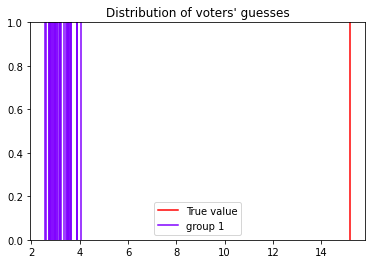

In [7]:
groups_sizes_0 = [32]
features_0 = [[1, 0,0,0]]

generator_0 = ev.RatingsGeneratorEpistemicGroupsMixScale(groups_sizes_0, features_0, group_noise=8, independent_noise=0.5,
                                                       center_gap=25, max_scale=4)
generator_0.plot_ratings()

In [4]:
list_agg = [ev.Aggregator(rule=ev.RuleFastNash(f=create_f(0)), name="SVDNash"),
             #ev.Aggregator(rule=ev.RuleCut(rule=ev.RuleFastNash(f=create_f(0)), cut=30), name="SVDNash 30"),
            ev.AggregatorSumRatings(),
            ev.Aggregator(rule=ev.RuleCut(rule=ev.RuleSumRatings(), cut=30), name="SumRatings 30"),
            ev.AggregatorProductRatings(),
            ev.Aggregator(rule=ev.RuleCut(rule=ev.RuleProductRatings(), cut=30), name="ProductRatings 30")]

In [5]:

n_candidates = 20
n_steps = 25
n_try = 1000
onlineLearning = ev.OnlineLearning(list_agg, generator_3)
onlineLearning(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [19:08<00:00,  1.15s/it]


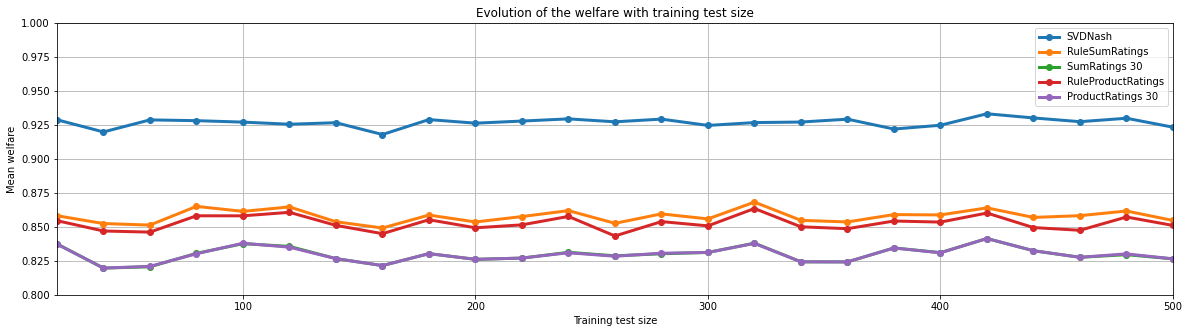

In [10]:
onlineLearning.plot(show=False)
plt.ylim(0.8,1)
plt.show()

# Ajouter historique pour tous

In [11]:
list_agg = [ev.Aggregator(rule=ev.RuleFastNash(f=create_f(0)), name="SVDNash"),
            ev.AggregatorSumRatings(),
            ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleSumRatings()), name="RuleSumRatings With History"),
            ev.AggregatorProductRatings(),
            ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleProductRatings()), name="RuleProductRatings With History"),
            ev.AggregatorMLEGaussian(),
            ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleMLEGaussian()), name="RuleMLEGaussian With History"),
           ]

In [12]:
n_candidates = 20
n_steps = 25
n_try = 1000
onlineLearning = ev.OnlineLearning(list_agg, generator_3)
onlineLearning(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [27:50<00:00,  1.67s/it]


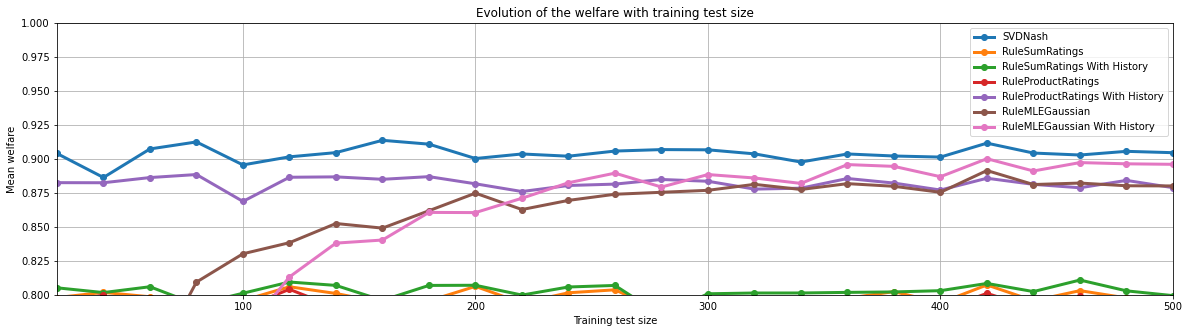

In [13]:
onlineLearning.plot(show=False)
plt.ylim(0.8,1)
plt.show()

# 30 algos SVDNash

In [10]:
n_candidates = 20
n_steps = 25
n_try = 2000
onlineLearning = ev.OnlineLearning([ev.Aggregator(rule=ev.RuleFastNash(f=create_f(0)), name="SVDNash")], generator_3)
onlineLearning(n_candidates, n_steps, n_try)
onlineLearning_0 = ev.OnlineLearning([ev.Aggregator(rule=ev.RuleFastNash(f=create_f(0)), name="SVDNash")], generator_0)
onlineLearning_0(n_candidates, n_steps, n_try)

100%|██████████| 2000/2000 [14:44<00:00,  2.26it/s]


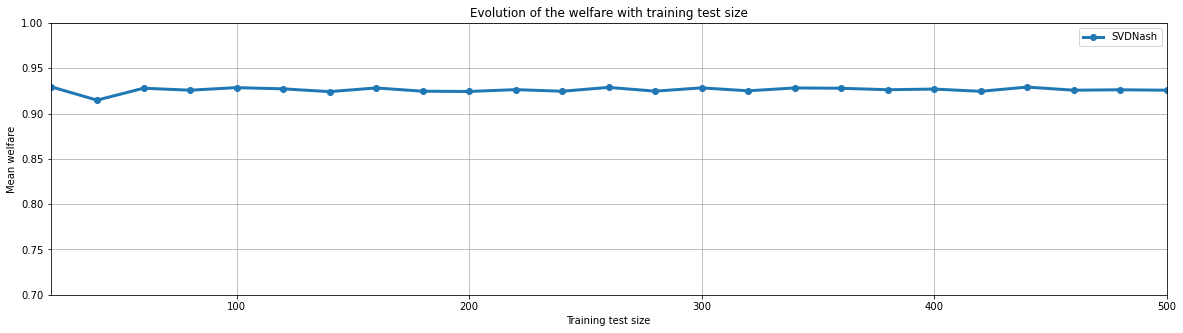

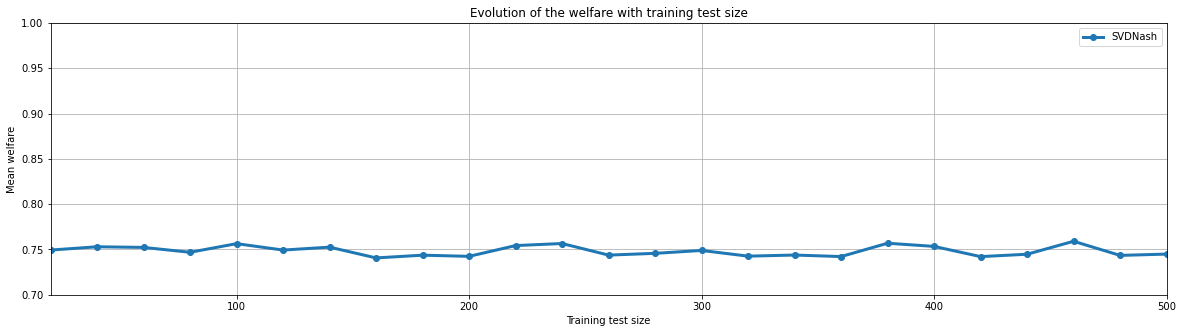

In [17]:
onlineLearning.plot(show=False)
plt.ylim(0.7,1)
plt.show()
onlineLearning_0.plot(show=False)
plt.ylim(0.7,1) 
plt.show()

# Autres fusées

## Classique (normal, normal)

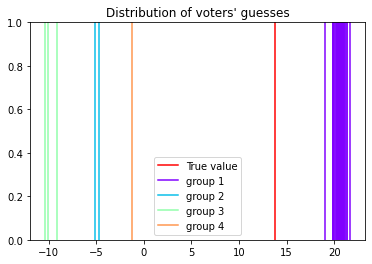

In [14]:
groups_sizes = [32, 2, 3, 1]
features = [[1, 0,0,0], [0, 1,0,0], [0,0,1,0], [0,0,0,1]]

generator_nn = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                        features, 
                                                        group_noise=8, 
                                                        independent_noise=0.5,
                                                        center_gap=10, 
                                                        max_scale=2,
                                                        group_noise_f=np.random.normal,
                                                        independent_noise_f=np.random.normal)
generator_nn.plot_ratings()

In [22]:
list_agg = [ev.Aggregator(rule=ev.RuleFastNash(f=create_f(0)), name="SVDNash"),
            ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleSumRatings()), name="RuleSumRatings With History"),
            ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleProductRatings()), name="RuleProductRatings With History"),
            ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleMLEGaussian()), name="RuleMLEGaussian With History")]

In [16]:
n_try = 1000
onlineLearning = ev.OnlineLearning(list_agg, generator_nn)
onlineLearning(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [21:47<00:00,  1.31s/it]


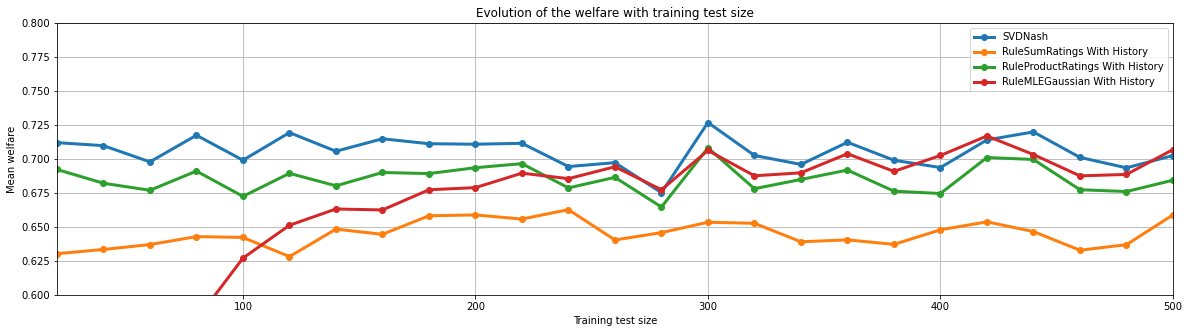

In [19]:
onlineLearning.plot(show=False)
plt.ylim(0.6,0.8)
plt.show()

## (Power, normal)

In [43]:
def fpower(x):
    
    def myf(size):
        return 1-np.random.power(x, size=size)
    return myf


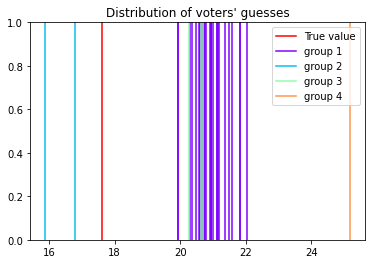

In [45]:
generator_pn = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                        features, 
                                                        group_noise=8, 
                                                        independent_noise=0.5,
                                                        center_gap=10, 
                                                        max_scale=2,
                                                        group_noise_f=fpower(1),
                                                        independent_noise_f=np.random.normal)
generator_pn.plot_ratings()

In [46]:
onlineLearning_pn = ev.OnlineLearning(list_agg, generator_pn)
onlineLearning_pn(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [24:04<00:00,  1.44s/it]


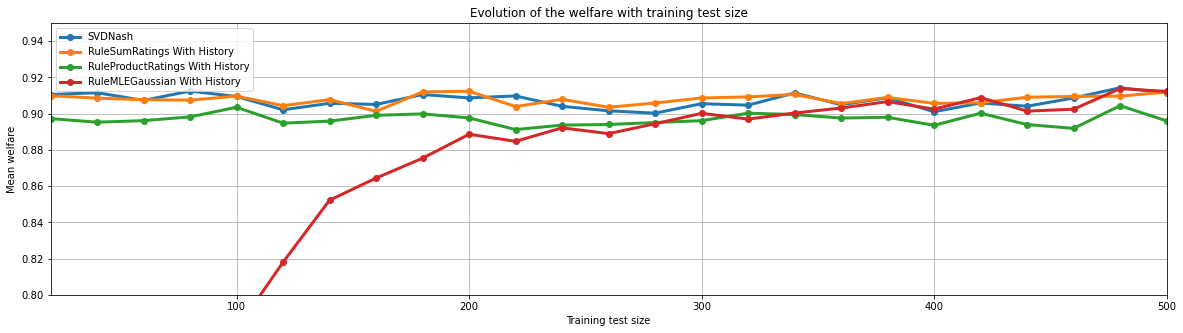

In [49]:
onlineLearning_pn.plot(show=False)
plt.ylim(0.8,0.95)
plt.show()

## (Normal, Power)

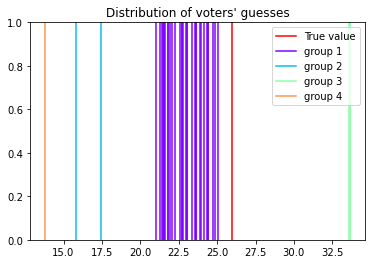

In [62]:
generator_np = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                        features, 
                                                        group_noise=8, 
                                                        independent_noise=5,
                                                        truth_generator = ev.TruthGeneratorUniform(minimum_value=20, maximum_value=40),
                                                        center_gap=10, 
                                                        max_scale=2,
                                                        group_noise_f=np.random.normal,
                                                        independent_noise_f=fpower(2))
generator_np.plot_ratings()

In [63]:
onlineLearning_np = ev.OnlineLearning(list_agg, generator_np)
onlineLearning_np(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [21:55<00:00,  1.32s/it]


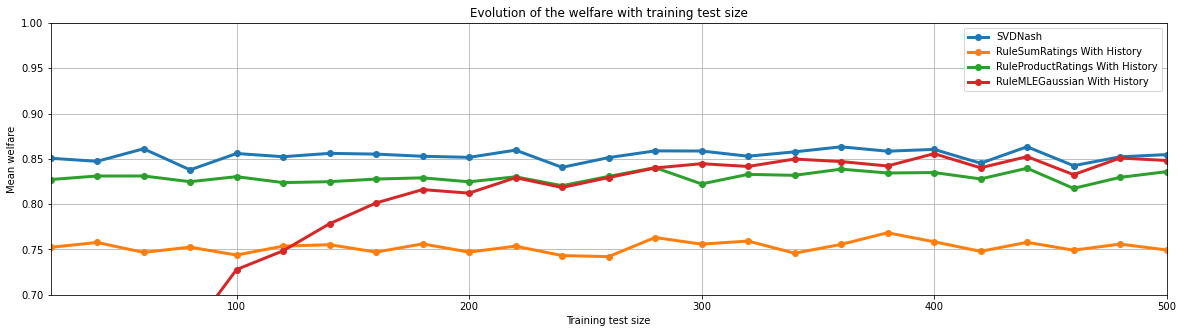

In [64]:

onlineLearning_np.plot(show=False)
plt.ylim(0.7,1)
plt.show()

## (Poisson, power)

In [65]:
def fpoisson(x):
    
    def myf(size):
        return np.random.poisson(x, size=size)
    return myf


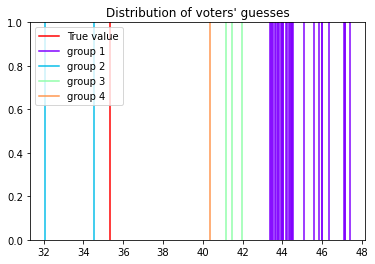

In [80]:
generator_bp = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                        features, 
                                                        group_noise=6, 
                                                        independent_noise=6,
                                                        truth_generator = ev.TruthGeneratorUniform(minimum_value=20, maximum_value=40),
                                                        center_gap=10, 
                                                        max_scale=2,
                                                        group_noise_f=fpoisson(1),
                                                        independent_noise_f=fpower(4))
generator_bp.plot_ratings()

In [81]:
onlineLearning_bp = ev.OnlineLearning(list_agg, generator_bp)
onlineLearning_bp(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [22:09<00:00,  1.33s/it]


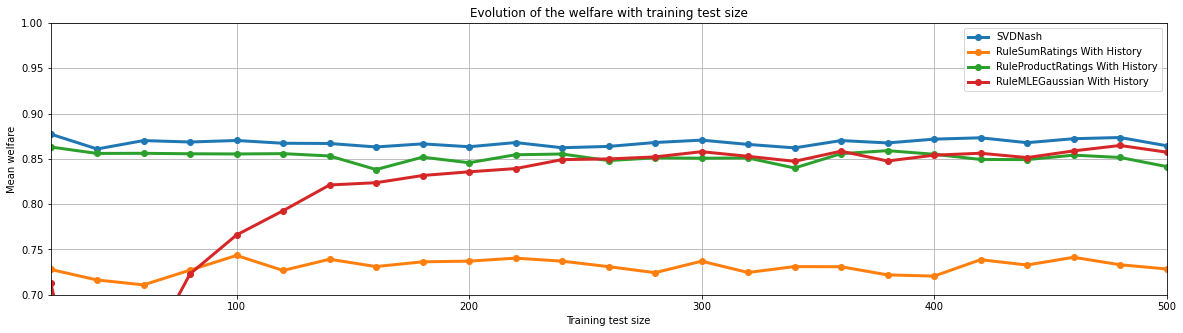

In [83]:

onlineLearning_bp.plot(show=False)
plt.ylim(0.7,1)
plt.show()

## (Power, poisson)

In [89]:
def fpoissongauss(x,y):
    
    def myf(size):
        return np.random.poisson(x, size=size) + np.random.normal(size=size)*y
    return myf


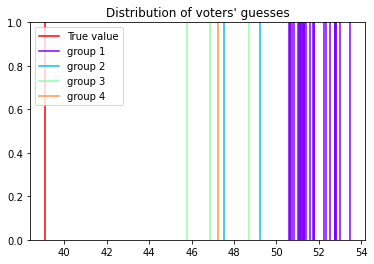

In [99]:
generator_pb = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                        features, 
                                                        group_noise=8, 
                                                        independent_noise=0.5,
                                                        truth_generator = ev.TruthGeneratorUniform(minimum_value=20, maximum_value=40),
                                                        center_gap=10, 
                                                        max_scale=2,
                                                        group_noise_f=fpower(1),
                                                        independent_noise_f=fpoissongauss(2,0.25))
generator_pb.plot_ratings()

In [100]:
onlineLearning_pb = ev.OnlineLearning(list_agg, generator_pb)
onlineLearning_pb(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [22:48<00:00,  1.37s/it]


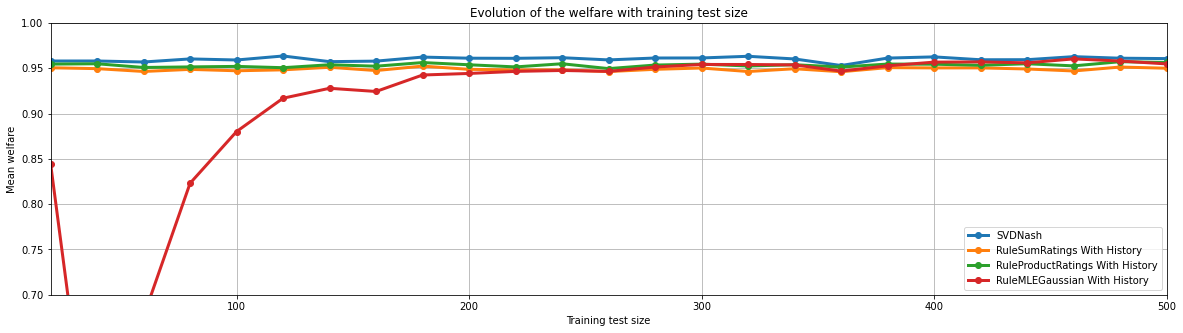

In [101]:

onlineLearning_pb.plot(show=False)
plt.ylim(0.7,1)
plt.show()

## (Normal, Poisson)

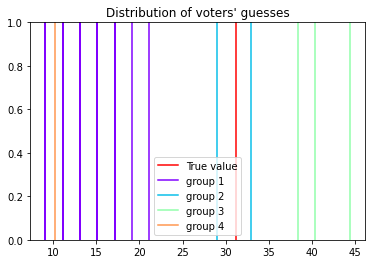

In [104]:
generator_pb2 = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                        features, 
                                                        group_noise=8, 
                                                        independent_noise=2,
                                                        truth_generator = ev.TruthGeneratorUniform(minimum_value=20, maximum_value=40),
                                                        center_gap=10, 
                                                        max_scale=2,
                                                        group_noise_f=np.random.normal,
                                                        independent_noise_f=fpoissongauss(2,0))
generator_pb2.plot_ratings()

In [105]:
onlineLearning_pb2 = ev.OnlineLearning(list_agg, generator_pb2)
onlineLearning_pb2(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [21:46<00:00,  1.31s/it]


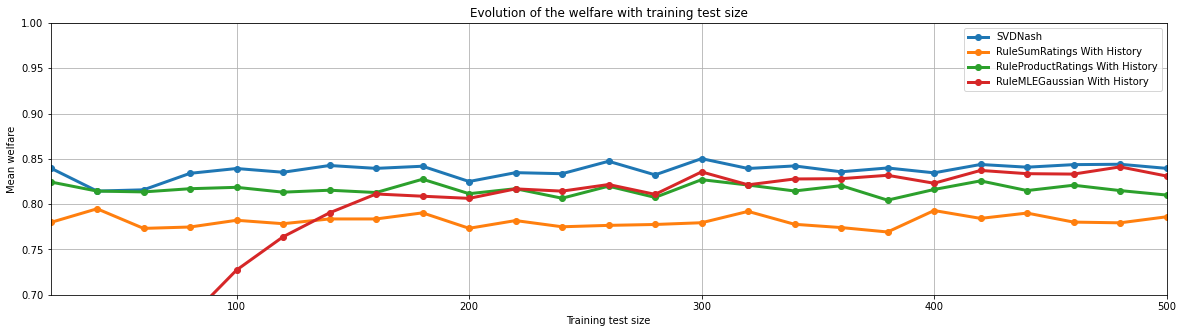

In [106]:
onlineLearning_pb2.plot(show=False)
plt.ylim(0.7,1)
plt.show()

# Accuracy variable

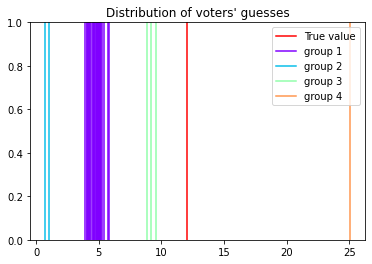

In [20]:
groups_sizes = [32, 2, 3, 1]
features = [[1, 0,0,0], [0, 1,0,0], [0,0,1,0], [0,0,0,1]]

generator_acc = ev.RatingsGeneratorEpistemicGroupsMixAcc(groups_sizes, 
                                                           features, 
                                                           group_noises=[5,8,12,15], 
                                                           independent_noise=0.5,
                                                           center_gap=25, 
                                                           max_scale=4)
generator_acc.plot_ratings()

In [25]:
onlineLearning_acc = ev.OnlineLearning(list_agg, generator_acc)
onlineLearning_acc(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [24:23<00:00,  1.46s/it]


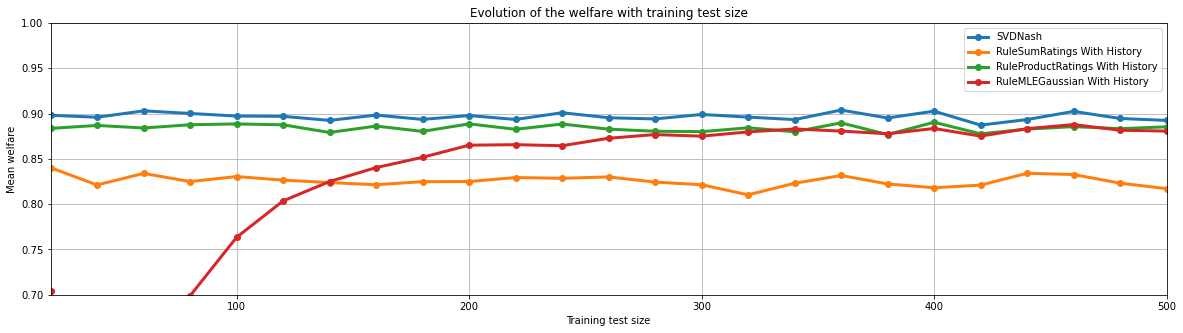

In [26]:
onlineLearning_acc.plot(show=False)
plt.ylim(0.7,1)
plt.show()

# Différents modèles de verité

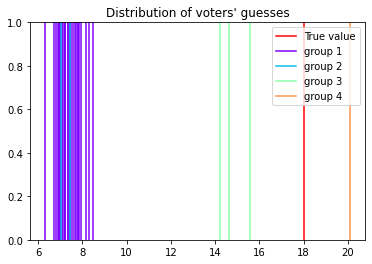

In [13]:
groups_sizes = [32, 2, 3, 1]
features = [[1, 0,0,0], [0, 1,0,0], [0,0,1,0], [0,0,0,1]]

generator_tp = ev.RatingsGeneratorEpistemicGroupsMixScale(groups_sizes, 
                                                          features, 
                                                          group_noise=3, 
                                                          truth_generator=ev.TruthGeneratorNormal(15, 2),
                                                          independent_noise=0.5,
                                                          center_gap=25, 
                                                          max_scale=4)
generator_tp.plot_ratings()

In [16]:
list_agg = [ev.Aggregator(rule=ev.RuleFastNash(f=create_f(0)), name="SVDNash[0]"),
            ev.Aggregator(rule=ev.RuleFastNash(f=create_f(2)), name="SVDNash[2]"),
            ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleSumRatings()), name="RuleSumRatings With History"),
            ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleProductRatings()), name="RuleProductRatings With History"),
            ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleMLEGaussian()), name="RuleMLEGaussian With History")]

In [17]:
onlineLearning_tp = ev.OnlineLearning(list_agg, generator_tp)
onlineLearning_tp(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [29:16<00:00,  1.76s/it]


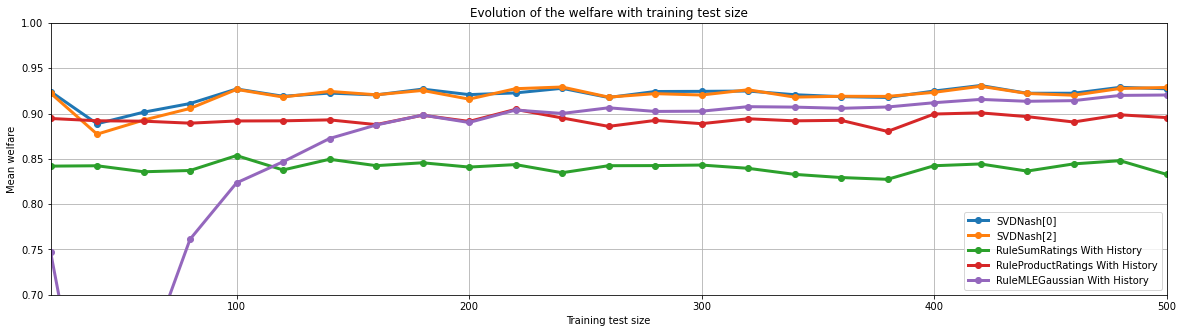

In [18]:
onlineLearning_tp.plot(show=False)
plt.ylim(0.7,1)
plt.show()

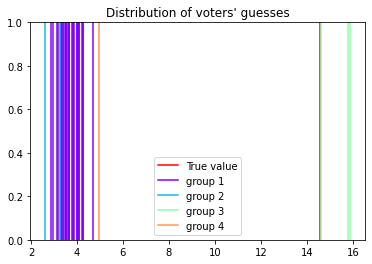

In [19]:
groups_sizes = [32, 2, 3, 1]
features = [[1, 0,0,0], [0, 1,0,0], [0,0,1,0], [0,0,0,1]]

generator_tpl = ev.RatingsGeneratorEpistemicGroupsMixScale(groups_sizes, 
                                                          features, 
                                                          group_noise=3, 
                                                          truth_generator=ev.TruthGeneratorPowerLaw(10, 20),
                                                          independent_noise=0.5,
                                                          center_gap=25, 
                                                          max_scale=4)
generator_tpl.plot_ratings()

In [20]:
onlineLearning_tpl = ev.OnlineLearning(list_agg, generator_tpl)
onlineLearning_tpl(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [29:00<00:00,  1.74s/it]


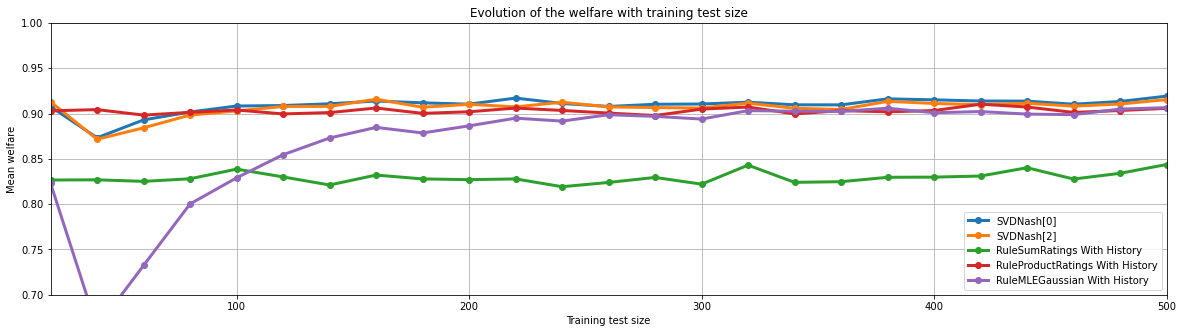

In [21]:
onlineLearning_tpl.plot(show=False)
plt.ylim(0.7,1)
plt.show()

In [23]:
list_agg = [ev.Aggregator(rule=ev.RuleFastNash(f=create_f(0)), name="SVDNash[0]"),
            ev.Aggregator(rule=ev.RuleFastNash(f=lambda x,y,z: x), name="SVDNash[id]"),
            ev.AggregatorSumRatings(),
            ev.AggregatorProductRatings()]

In [24]:
onlineLearning_tpl2 = ev.OnlineLearning(list_agg, generator_tpl)
onlineLearning_tpl2(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [15:25<00:00,  1.08it/s]


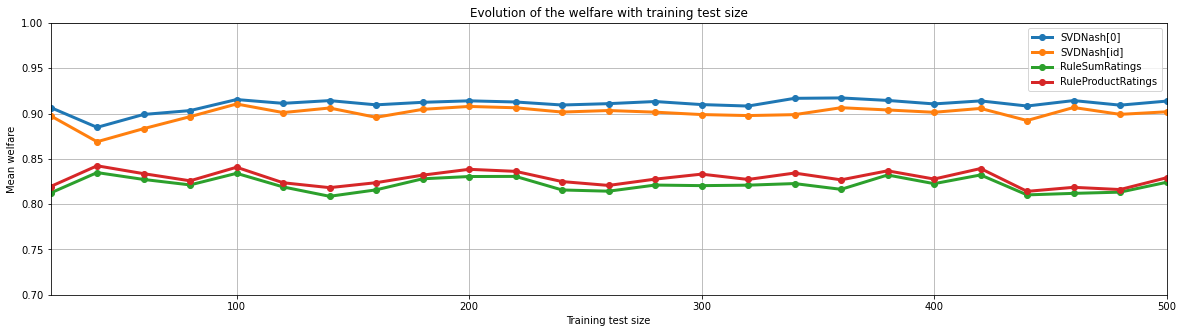

In [26]:
onlineLearning_tpl2.plot(show=False)
plt.ylim(0.7,1)
plt.show()